In [12]:
import pandas as pd
from tkinter import _flatten
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
from wordcloud import WordCloud
from pyecharts.charts import Map,Pie,Radar,EffectScatter,Bar,Tab,Line,Scatter
import pyecharts.options as opts

# 招聘信息可视化分析
job_information = pd.read_csv('data_pre.csv',converters={'工作描述':eval})
job_information

,岗位名称,薪资待遇,实习时长,工作描述,学历要求,招聘人数,发布时间,公司名称,公司规模,工作地点,企业领域,发布日期,年
0,实习生,116.67,长期,"[集团, 包含, 项目, 岗位, 实习]",大专,10,2023-02-22 10:48:00,诚信行物业,3001人及以上,广东省,建筑|地产|家居,2023-02-22,2023
1,HR实习生-招聘方向,135.00,3个月,"[工作, 地点, 深圳]",本科,2,2021-09-16 16:35:00,小米,3001人及以上,北京市,互联网|游戏|软件,2021-09-16,2021
2,社区内容运营实习,175.00,长期,"[负责, 挖掘, 头像, 壁纸, 表情, 包, 素材, 内容, 流行, 趋势, 玩法]",本科,1,2023-04-10 16:33:00,堆糖,51~100人,上海市,互联网|游戏|软件,2023-04-10,2023
3,客户执行实习生,135.00,3个月,"[协助, 客户经理, 做好, 客户, 后续, 衔接, 公司, 内部, 相关, 执行, 工作]",本科,2,2023-03-23 10:13:00,爱点击,1001~3000人,上海市,互联网|游戏|软件,2023-03-23,2023
4,国际物流管理实习生,165.00,3个月,"[ , 负责, 制单, 要求, 制作, 发票, 箱单, 产地证, 负责, 出具, 海运, 保...",本科,1,2023-03-30 10:49:00,美的集团,3001人及以上,广东省,汽车|机械|制造,2023-03-30,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,人力资源实习生-员工关系方向,125.00,2个月,"[协助, 员工, 关系, 入, 续, 转, 调, 手续, 办理]",本科,1,2023-04-10 13:29:00,利奥医药,101~300人,浙江省,生物|医药,2023-04-10,2023
409,行政助理实习生,125.00,2个月,"[ , 联络人, 协助, GCO, , China, 进行, 临床试验, 审批, 材料, ...",本科,1,2023-04-10 13:29:00,利奥医药,101~300人,吉林省,生物|医药,2023-04-10,2023
410,人力资源实习生-员工关系方向,125.00,2个月,"[协助, 员工, 关系, 入, 续, 转, 调, 手续, 办理]",本科,1,2023-04-10 13:29:00,利奥医药,101~300人,吉林省,生物|医药,2023-04-10,2023
411,行政助理实习生,125.00,2个月,"[ , 联络人, 协助, GCO, , China, 进行, 临床试验, 审批, 材料, ...",本科,1,2023-04-10 13:29:00,利奥医药,101~300人,云南省,生物|医药,2023-04-10,2023


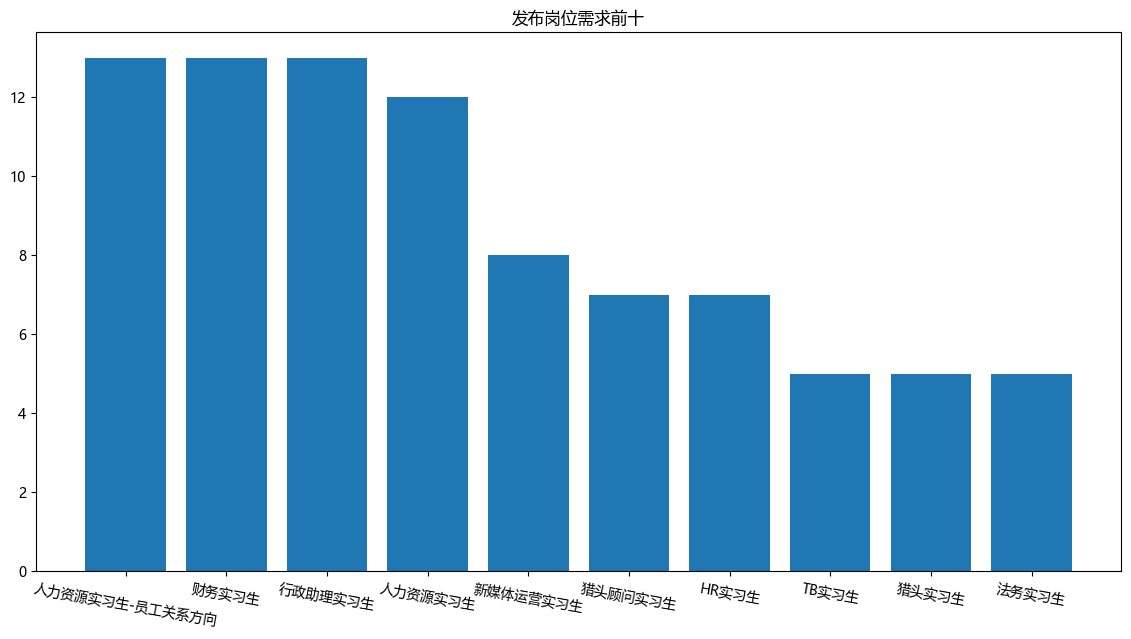

In [13]:
# 发布岗位需求前十
job_Top10 = job_information['岗位名称'].value_counts()[:10]
x = job_Top10.index.tolist()
y = job_Top10.tolist()
fig = plt.figure(figsize=(14,7))
plt.bar(x,y)
plt.xticks(rotation=-10)
plt.title('发布岗位需求前十')
plt.show()

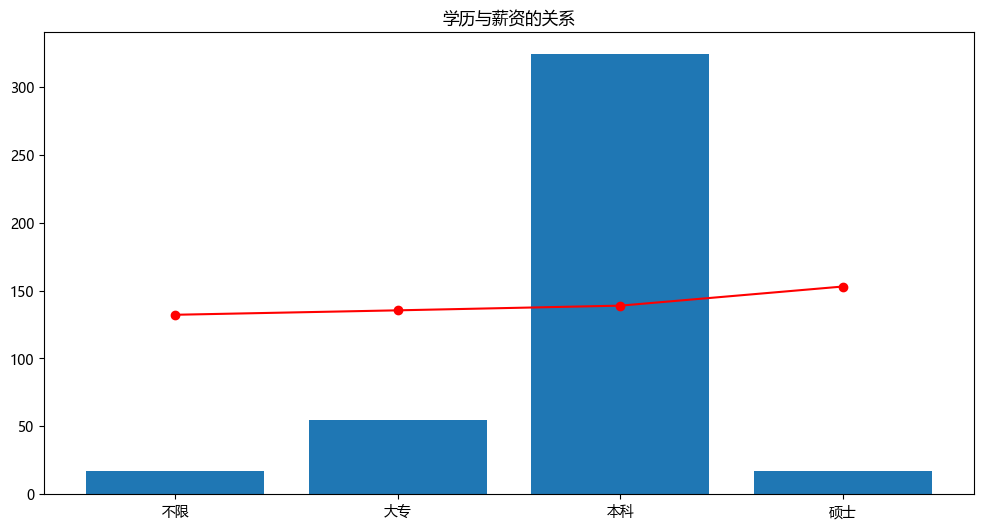

In [14]:
# 学历要求与薪资待遇的关系(按学历要求分组，计算每个学历级别的平均薪资和职位数量)
edu_salary = job_information[['薪资待遇','学历要求','岗位名称']].groupby(by='学历要求',as_index=False).agg(薪资=('薪资待遇','mean'),数量=('岗位名称','count'))
fig = plt.figure(figsize=(12,6))
# 学历与薪资关系的折线图
plt.plot(edu_salary['学历要求'], edu_salary['薪资'],'ro-',)
# 不同学历要求的职位数量分布条形图
plt.bar(edu_salary['学历要求'], edu_salary['数量'])
plt.title('学历与薪资的关系')
plt.show()

C:\Users\86182\AppData\Local\Temp\ipykernel_41980\4273575806.py:3: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  job_num = job_2023.groupby(by='发布日期',as_index=False)['岗位名称'].agg({'数量':'count'})


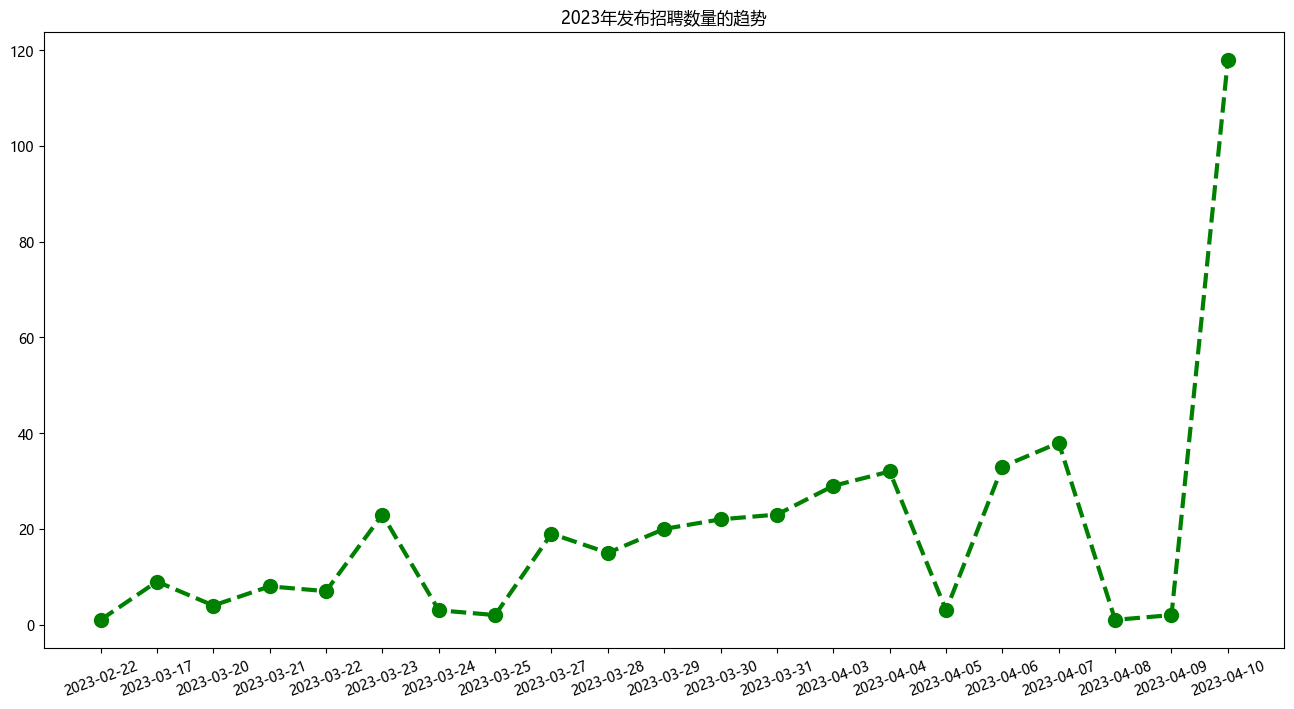

In [15]:
# 2023年发布招聘数量的趋势
job_2023 = job_information.loc[job_information['年']==2023,['岗位名称','发布日期']]
job_num = job_2023.groupby(by='发布日期',as_index=False)['岗位名称'].agg({'数量':'count'})
fig = plt.figure(figsize=(16,8))
plt.plot(job_num['发布日期'],job_num['数量'], 'go--',linewidth=3, markersize=10)
plt.xticks(rotation=20)
plt.title('2023年发布招聘数量的趋势')
plt.show()

In [16]:
# 实习时长要求占比(使用pyecharts的Pie类来绘制一个环形饼图，展示实习时长要求的占比情况)
data = job_information[['实习时长','岗位名称']].groupby(by='实习时长',as_index=False).count()
labels = data['实习时长']
values = data['岗位名称']

pie = Pie(init_opts=opts.InitOpts(width='880px',height='550px'))
pie.add(series_name='',data_pair=[(i, j) for i, j in zip(labels, values)],
        radius=(80,200))
pie.set_global_opts(title_opts=opts.TitleOpts(title='实习时长要求占比情况'))
pie.render('实习时长要求占比情况.html')

'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\实习时长要求占比情况.html'

In [17]:
# 各省份人才需求情况(使用Pyecharts的Map组件绘制了中国各省份的岗位数量分布地图)
data = job_information[['工作地点','招聘人数']].groupby(by='工作地点',as_index=False)['招聘人数'].agg({'数量':'sum'})
labels = data['工作地点'].to_list()
values = data['数量'].to_list()
# 选图
map2 = Map()
# 选区域地图
map2.add('',
         [(i, j) for i, j in zip(labels, values)],
         maptype='china'        
)

# 全局变量
map2.set_global_opts(
    title_opts = opts.TitleOpts(title="岗位数量工作地点分布"),
    visualmap_opts=opts.VisualMapOpts(max_=800)
)

# 地图展示
map2.render('岗位数量工作地点分布.html')

C:\Users\86182\AppData\Local\Temp\ipykernel_41980\3558071285.py:2: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  data = job_information[['工作地点','招聘人数']].groupby(by='工作地点',as_index=False)['招聘人数'].agg({'数量':'sum'})


'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\岗位数量工作地点分布.html'

In [18]:
# 各省份各行业的薪资水平情况(使用pyecharts库创建分组柱状图，用于展示不同工作地点（省份）在不同企业领域（行业）的平均薪资水平)
data = job_information[['工作地点','企业领域','薪资待遇']].groupby(by=['工作地点','企业领域'],as_index=False).mean()
ls = list(set(data['工作地点']))
bar = Bar(init_opts=opts.InitOpts(width='950px',height='650px'))
for i in ls:
    tmp_data = data.loc[data['工作地点']==i,]
    bar.add_xaxis(list(set(data['企业领域'])))
    bar.add_yaxis(i,tmp_data['薪资待遇'].tolist())
    
bar.set_global_opts(
            title_opts=opts.TitleOpts(title="各省份各行业的薪资水平"),
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=25,formatter='{value}\n')),
            legend_opts=opts.LegendOpts(pos_top=15),
tooltip_opts=opts.TooltipOpts(
                is_show=True, trigger="axis", axis_pointer_type="shadow"
            ),)

bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar.render('各省份各行业的薪资水平.html')

'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\各省份各行业的薪资水平.html'

In [19]:
# 各公司的薪资水平和人才需求量(使用pyecharts创建组合图表，展示各公司的薪资水平（折线图）和人才需求量（柱状图）)
data = job_information[['公司名称','招聘人数','薪资待遇']].groupby(by=['公司名称'],as_index=False).agg({'薪资待遇':'mean','招聘人数':'sum'}).sort_values(by='薪资待遇',ascending=False)
labels = data['公司名称'].tolist()
values1 = data['招聘人数'].tolist()
values2 = data['薪资待遇'].tolist()
bar = Bar(init_opts=opts.InitOpts(width='950px',height='650px'))
bar.add_xaxis(labels)
bar.add_yaxis('',values1)
bar.set_global_opts(
        title_opts=opts.TitleOpts(title="各公司的薪资水平和人才需求量"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        datazoom_opts=opts.DataZoomOpts(range_start=0,range_end=5,pos_bottom=-5)
    )

line = Line()
line.add_xaxis(labels)
line.add_yaxis('',values2)
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
bar.overlap(line).render('各公司的薪资水平和人才需求量.html')

'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\各公司的薪资水平和人才需求量.html'

In [20]:
# 公司规模占比情况(使用pyecharts库绘制南丁格尔玫瑰图，用于展示不同公司规模的占比情况)
data = job_information['公司规模'].value_counts()
labels = data.index.tolist()
values = data.values.tolist()

pie = Pie(init_opts=opts.InitOpts(width='880px',height='550px'))
pie.add(series_name='',data_pair=[(i, j) for i, j in zip(labels, values)],
        rosetype='radius')
pie.set_global_opts(
    title_opts=opts.TitleOpts(title='公司规模占比情况'),
    legend_opts=opts.LegendOpts(pos_top=20))
pie.render('公司规模占比情况.html')

'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\公司规模占比情况.html'

In [21]:
# 公司规模与人才需求量和薪资水平的关系(使用Pyecharts创建散点图和折线图分析不同规模公司的招聘需求量和薪资水平的关系)
data = job_information[['公司规模','招聘人数','薪资待遇']].groupby(by=['公司规模'],as_index=False).agg({'薪资待遇':'mean','招聘人数':'sum'}).sort_values(by='薪资待遇')
labels = data['公司规模'].tolist()
values1 = data['招聘人数'].tolist()
values2 = data['薪资待遇'].tolist()
scatter = Scatter()
scatter.add_xaxis(labels)
scatter.add_yaxis('人才需求',values1)
scatter.set_global_opts(
        title_opts=opts.TitleOpts(title="公司规模与人才需求量和薪资水平的关系"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15))
    )

line = Line()
line.add_xaxis(labels)
line.add_yaxis('薪资水平',values2)
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
scatter.overlap(line).render('公司规模与人才需求量和薪资水平的关系.html')

'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\公司规模与人才需求量和薪资水平的关系.html'

In [22]:
# 各行业的人才需求量(使用Pyecharts库中的EffectScatter（带有涟漪特效动画的散点图）来展示各行业的人才需求量)
data = job_information[['企业领域','招聘人数']].groupby(by='企业领域',as_index=False).sum().sort_values(by='招聘人数',ascending=False)
escatter = EffectScatter()
escatter.add_xaxis(data['企业领域'].tolist())
escatter.add_yaxis("",data['招聘人数'].tolist())
escatter.set_global_opts(
        title_opts=opts.TitleOpts(title="各行业的人才需求量"),
        xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True),
                                 axislabel_opts=opts.LabelOpts(rotate=25)
),
        yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
    )
escatter.render('各行业的人才需求量.html')

'f:\\桌面\\杂物箱\\电脑学习\\Python\\实战项目\\visual_analysis\\各行业的人才需求量.html'

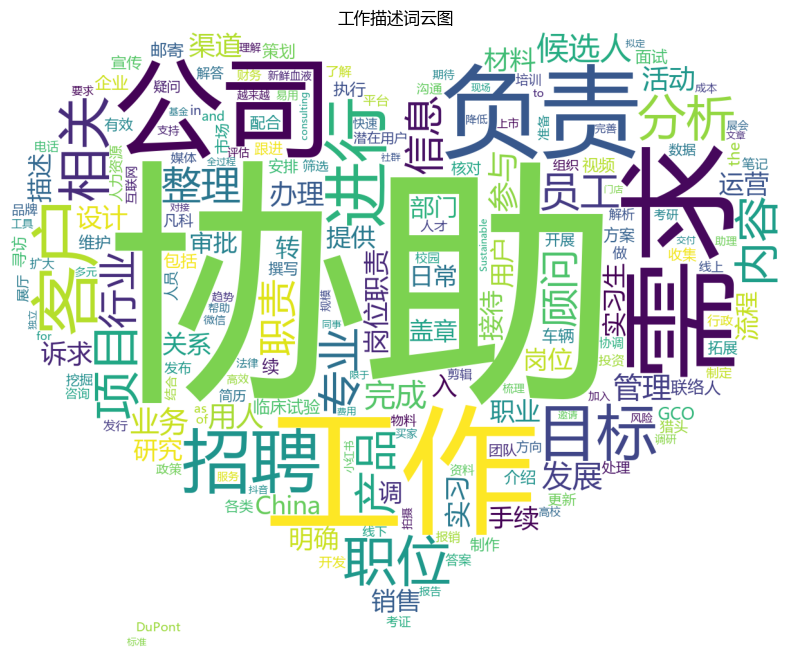

In [23]:
# 工作描述词云图(使用WordCloud库生成一个基于工作描述的词云图，并使用一个心形图片作为遮罩)
mask = plt.imread('aixin.jpg')
word_fre =pd.Series(_flatten(job_information['工作描述'].tolist())).value_counts()
# 其中font_path为字体路径
# 获取 matplotlib 中的的Microsoft YaHei字体路径
font_path = fm.findfont(fm.FontProperties(family='Microsoft YaHei'))
wc = WordCloud(width=500,height=600,mask=mask, background_color='white', font_path=font_path)
wc.fit_words(word_fre)
plt.figure(figsize=(12,8))
plt.title('工作描述词云图')
plt.imshow(wc)
plt.axis("off")
plt.show()